### 유방암 데이터에 대하여 Decision Tree Classifier를 사용하여 유방암 진단 결과를 분류 한다.

In [1]:
# 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 유방암 데이터 로드
# 훈련 데이터와 검증 데이터는 train_test_split으로 분리
# 입력 데이터는 cancer.data, 레이블 데이터는 cancer.target에 저장
cancer = load_breast_cancer() 
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target) 

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.916083916083916


In [5]:
# 유방암 데이터 특징의 이름과 모델 중요도
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0172),
 ('smoothness error', 0.0024),
 ('compactness error', 0.012),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0172),
 ('worst texture', 0.0396),
 ('worst perimeter', 0.6947),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.1211),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [6]:
# 중요도 높은 순서 표시하기 위해 데이터 프레임 구축
# 상위 20개 특성 출력
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })

df=df.sort_values('importance', ascending=False) 
print(df.head(20))

                    feature  importance
22          worst perimeter    0.694689
27     worst concave points    0.121068
7       mean concave points    0.042647
1              mean texture    0.041720
21            worst texture    0.039639
13               area error    0.017216
20             worst radius    0.017188
15        compactness error    0.012042
8             mean symmetry    0.011405
14         smoothness error    0.002385
23               worst area    0.000000
18           symmetry error    0.000000
24         worst smoothness    0.000000
25        worst compactness    0.000000
26          worst concavity    0.000000
28           worst symmetry    0.000000
19  fractal dimension error    0.000000
0               mean radius    0.000000
17     concave points error    0.000000
16          concavity error    0.000000


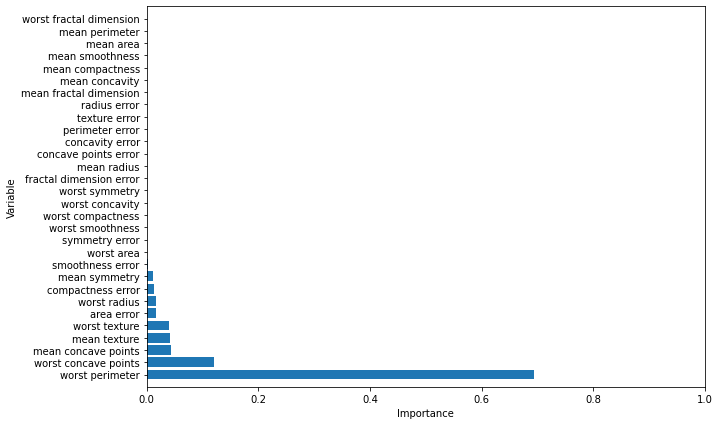

In [7]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()